Data Science Blog Post


The worldwide chocolate consumption in 2024 is up to 7.5 million tons, and with Easter rapidly approaching Americans alone are expected to spend 2 billion dollars on chocolate. With consumption being at an all time high both  cocoa bean producers and chocolate manufacturers need to ensure sufficient amounts are being produced.  
However, with such large quantities being produced, quality needs can easily be forgotten.  Indeed, we all have our favoured chocolate bar, or brand, but what makes it stand out? Is it the country the bar was made in? The region the cocoa beans were grown? Perhaps a combination of numerous of these factors.  

Using expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown, this post digs a bit deeper into what differentiates chocolate bars. 



1. How can subjective flavours be rated equally and fairly?

Indeed, preferences of chocolates are largely subjective. However, experts have created a system aiming to make sure the ratings are as fair and accurate as possible. While subjective values cannot fully be removed, the system created rates every bar using the same criteria, ensuring fair results and avoiding bias. 
Firstly, in order to simplify the task and standardize the bars, our research will focus only on plain dark chocolate with an aim of appreciating the flavors of the cacao bean when made into chocolate. Additionally, a clear Rating System has been created based on four features: Flavour, Texture, Aftermelt and Overall opinion. 
The Flavors of Cacao Rating System is as follows:
5= Elite (Transcending beyond the ordinary limits)
4= Premium (Superior flavor development, character and style)
3= Satisfactory(3.0) to Praiseworthy(3.75) (well made with special qualities)
2= Disappointing (Passable but contains at least one significant flaw)
1= Unpleasant (mostly unpalatable)



Below we can see a snippet of the data being used in our analysis and its numerous features:

2. Distribution of the 1700 chocolate bar ratings:

Before diving into what factors go into creating the best dark chocolate, let's understand how these bar ratings are distributed.  

The density plot below shows that the majority of chocolate bars are rated satisfactory to praiseworthy, with 644 bars being satisfactory and 602 being praiseworthy.  This category is the modal class, taking up almost 70% of the 1796 bars rated. Additionally, the data is negatively skewed, meaning that a majority of bars have a rating of 3 or more.   This is good news for us consumers!  

With just under 95% percent of bars stuck under a rating of 3.75, what makes the top bars stand out?  Understanding manufacturing location, bean origin and cocoa business trends will give us a little more insight into what it takes to make top rated dark chocolate.

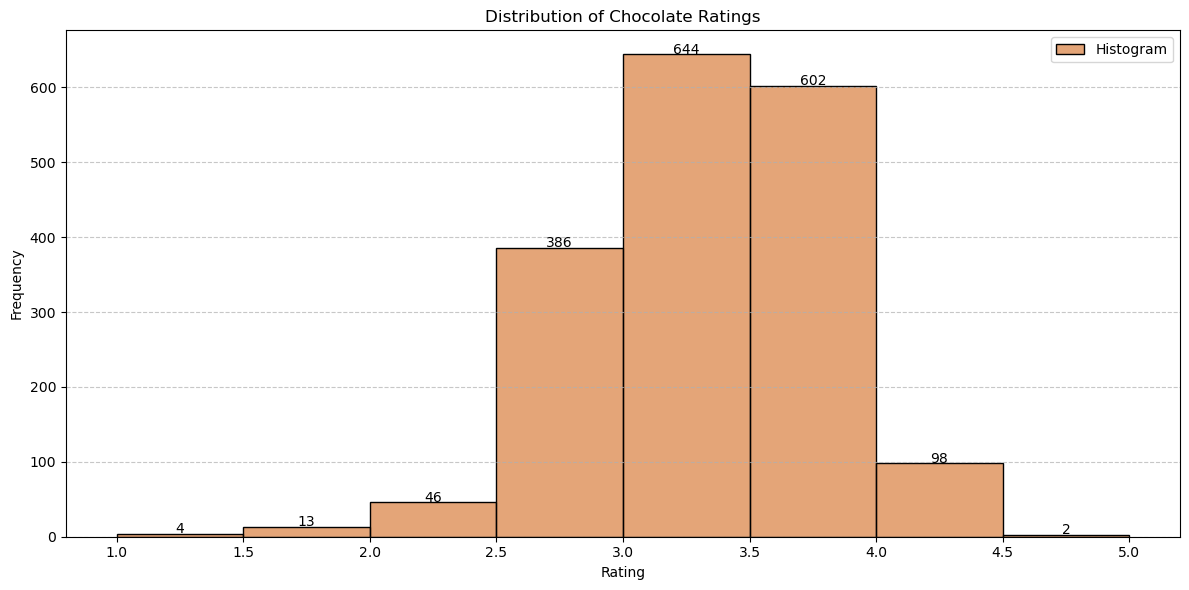

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\thoma\OneDrive\Documents\Exeter Year 1\Data Science project\Final_Project\Bean Data.csv"
chocolate_df = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))

# Creating the histogram with seaborn
hist_plot = sns.histplot(chocolate_df['Rating'], bins=8, kde=False, color='chocolate', alpha=0.6, label='Histogram')

# Adding data labels on top of bars
for patch in hist_plot.patches:
    count = int(patch.get_height())  # Get bar height (frequency)
    if count > 0:  # Add label if count is non-zero
        plt.text(patch.get_x() + patch.get_width() / 2, count + 1,  # Slightly above the bar
                 str(count), ha='center', fontsize=10, color='black')

# Adding gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Setting labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Chocolate Ratings')

# Adjusting the legend position for better alignment
plt.legend(loc='upper right')  # Positioned logically away from the x-axis

# Ensuring the plot is visually appealing
plt.tight_layout()
plt.show()



Now I am sure if you are a chocolate fanatic like me, you will all want to know about the only bar that achieved the top rating of 5/5 and where it comes from so that you can try it as soon as possible! But let's not get ahead of ourselves, we are also here to gain knowledge, not just devour it as usual. So before I give you that satisfaction, let's dig a little deeper into where the best chocolate comes from and  what makes it so special. 


3. Where does the best rated chocolate come from?

It is widely recognized, that geographically representing data helps give a holistic understanding of the variables being studied.  Putting locations behind our data will enable us to narrow down our focus, understanding how the cocoa bean origin and manufacturing country affect the quality of chocolate.   

Visually analysing geographic patterns helps comprehend cocoa business trends and production lines. This can be helpful for consumers who want to understand the origins of the best bars, but visualising spatial information can also be crucial in facilitating data-driven decision making for businesses or producers.   

Let's start with the big picture.  The bar chart below shows the average rating of chocolate bar by region.  In this plot, each bar has been sorted into a region corresponding to the country the bar was manufactured in and the company is from. By sorting each country into regions it allows for a cleaner plot with less variables and enables a clear and fast comprehension of which regions produce the highest rated dark chocolate. 
Asia and Europe have the highest average rated bars whereas Africa has the lowest.  

It is important to note that the difference in average rating is rather minor due to the scale on the y-axis being concetrated between 3.0 and 3.5 However, this is still insightful in identifying the best chocolate making regions. 

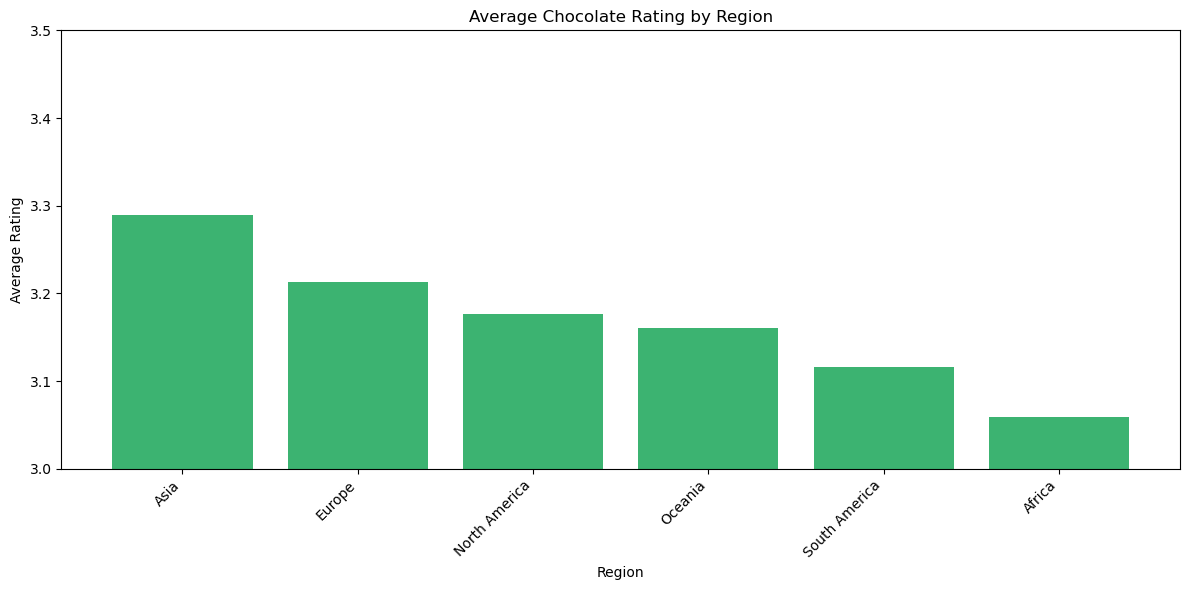

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your dataset file
file_path = r"C:\Users\thoma\OneDrive\Documents\Exeter Year 1\Data Science project\Final_Project\Bean Data.csv"

# Load the CSV file into a DataFrame
chocolate_df = pd.read_csv(file_path)

# Combine "Latin America" and "South America" into one region named "South America"
chocolate_df['Region'] = chocolate_df['Region'].replace({
    'Latin America': 'South America',
    'south america': 'South America'  # To handle any case differences
})

# Group by 'Region' and calculate the average rating
region_avg = chocolate_df.groupby('Region')['Rating'].mean().reset_index()

# Sort the regions by average rating for better visualization
region_avg = region_avg.sort_values(by='Rating', ascending=False)

# Plot the bar chart with improved styling
plt.figure(figsize=(12, 6))
plt.bar(region_avg['Region'], region_avg['Rating'], color='mediumseagreen')
plt.ylim(3, 3.50)  # Adjust the y-axis range
plt.xlabel('Region')
plt.ylabel('Average Rating')
plt.title('Average Chocolate Rating by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



As mentionned above, the geographic element of data is extremely important.  Plotting our data on a map effectively does this.
 
Below is a map of the Average Rating by Country of manufacturing.  We can see the major regions in which chocolate is being manufactured. 
We would expect countries such as Switzerland; France, Belgium or Italy to be the darkest regions in this plot, however Chile has the highest average rating.  
This is surprising, however, it is important to note that these are average scores per country.  Some countries have more bars produced in them than others therefore changing the average. Additionally, countries that we would expect to produce the best chocolate may still have the highest rated bar, this isn't necessarily represented in this map.  



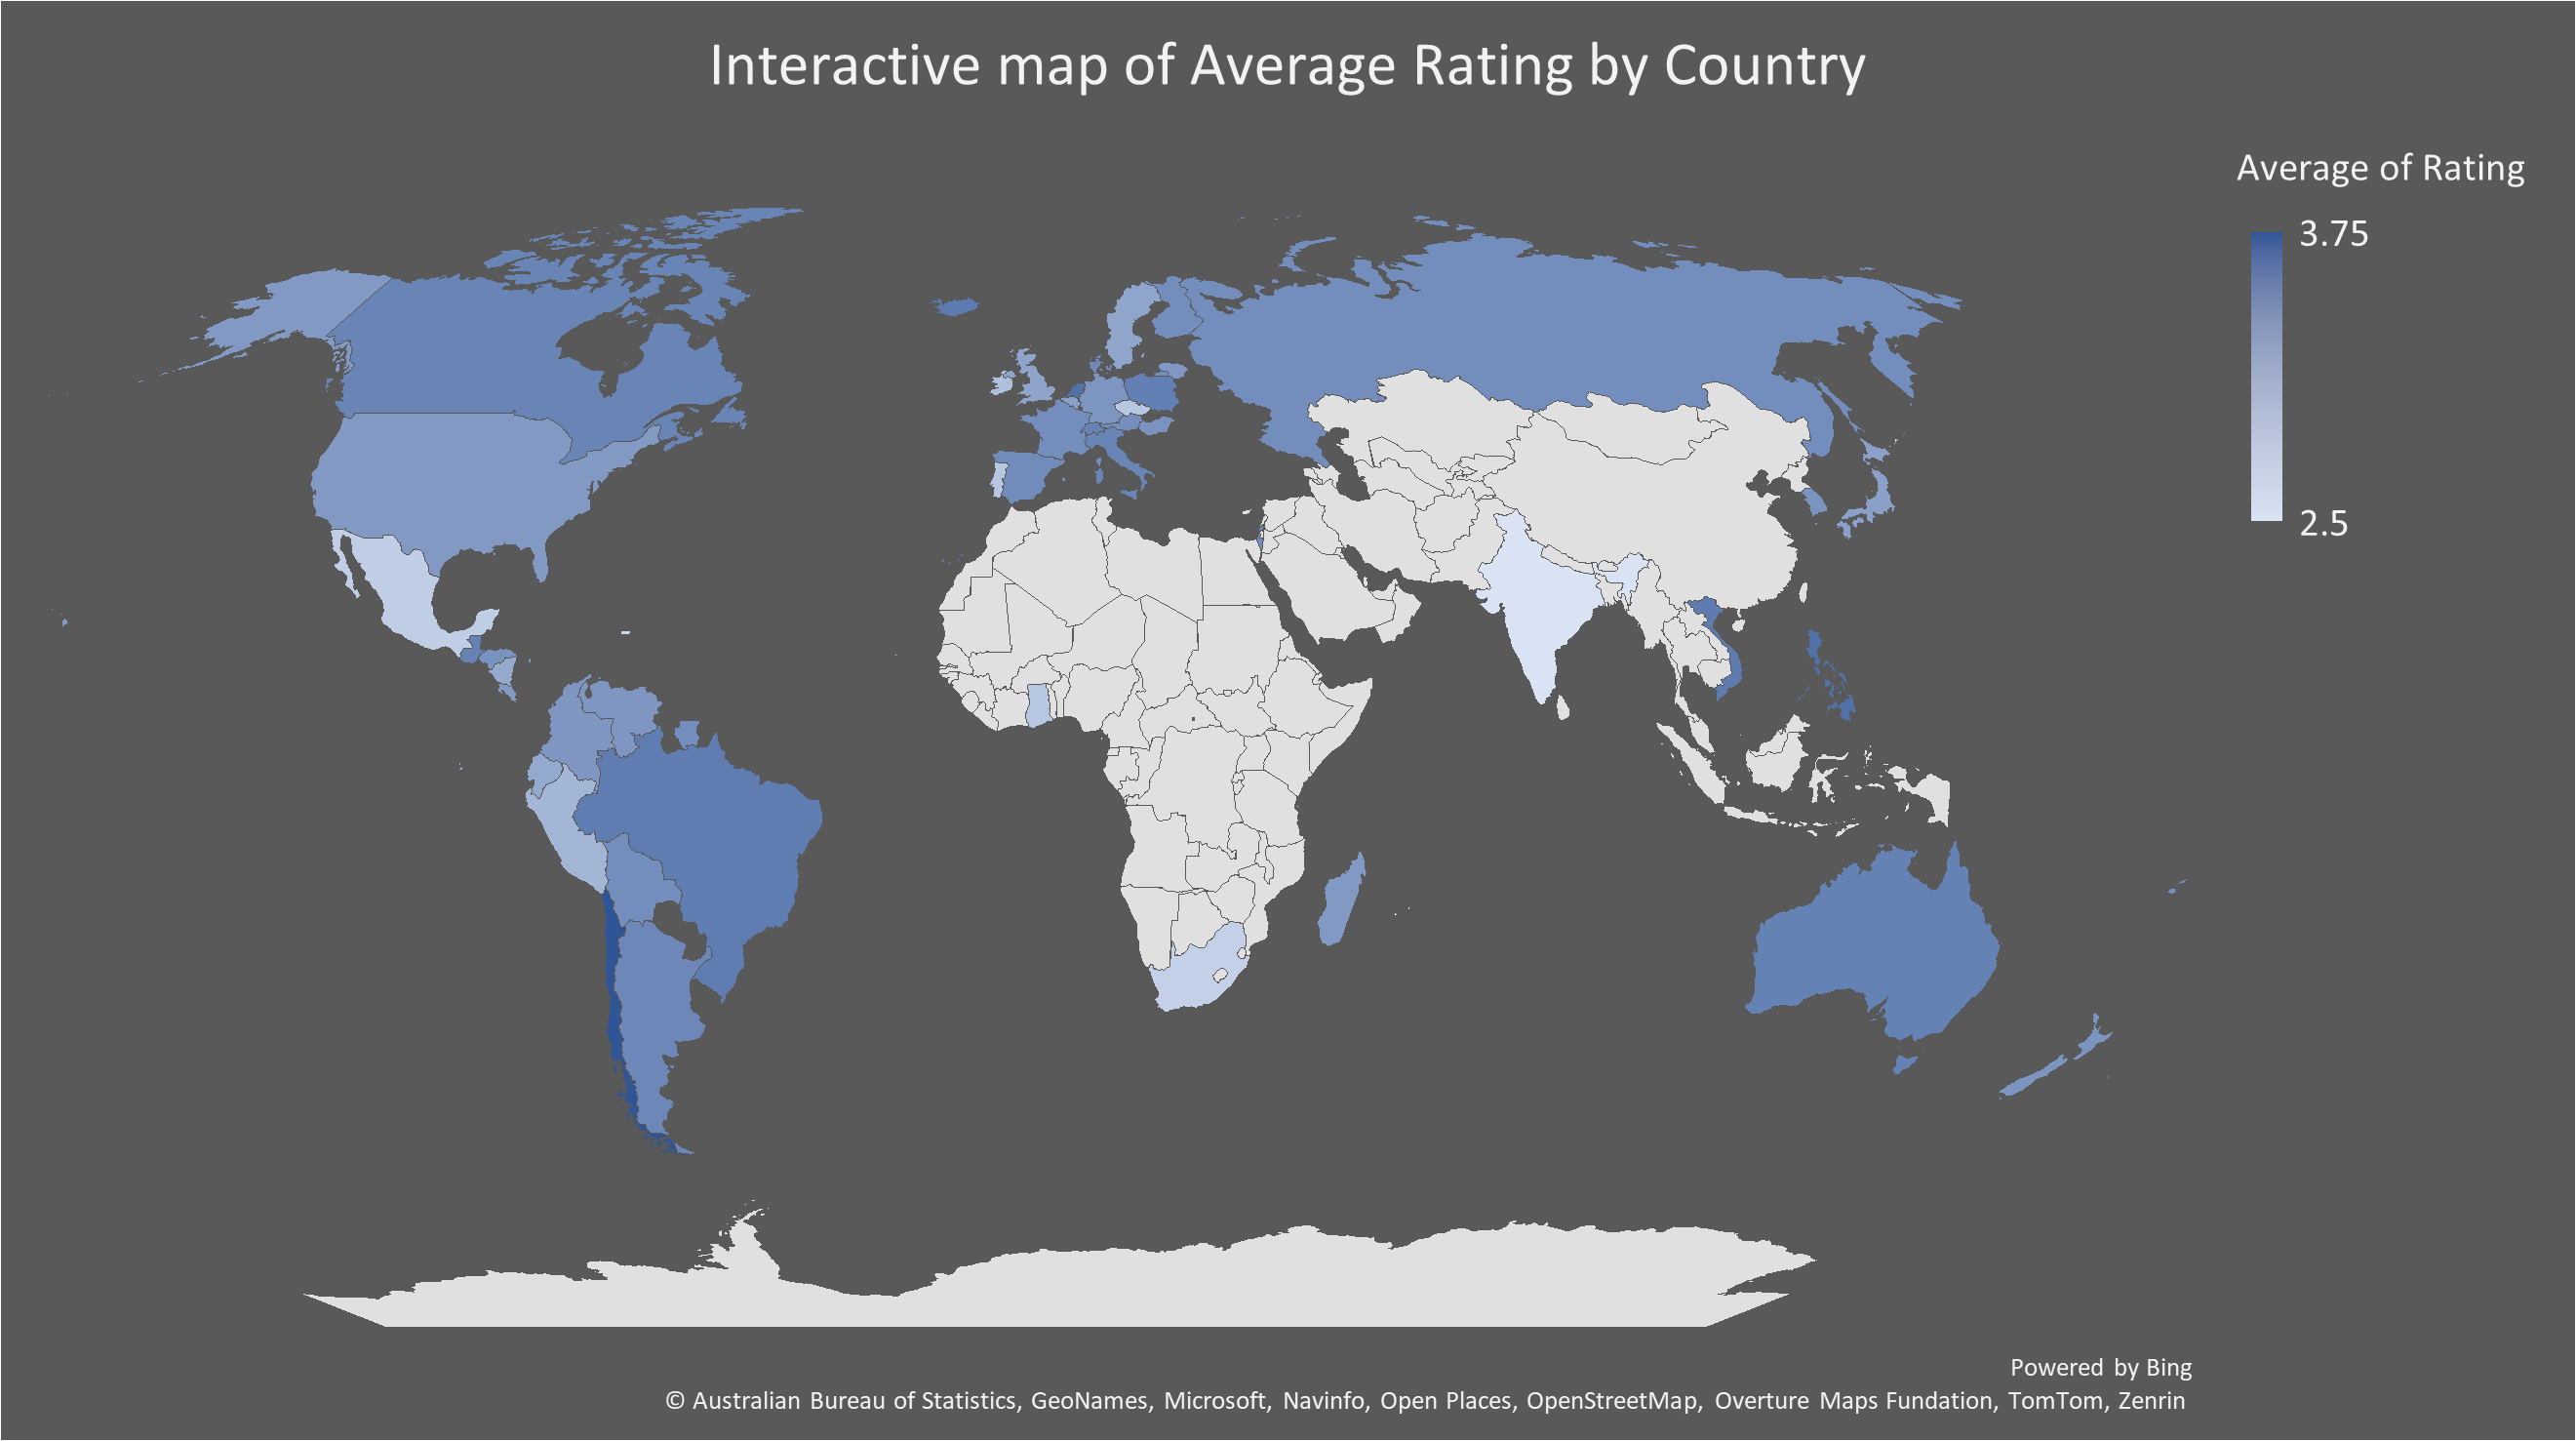

Another interesting point of analysis would be to understand where the best beans originate from.  Cacao beans typically grow within 20 degrees of the equator. This distinctive growing region is commonly referred to as the “cocoa belt.” This limits the possibilities of where our favourite bars originate from.  

It can be noted that chocolate is not often manufactured in the same countries where cocoa beans are grown. As seen below, cocoa beans are grown in equatorial countries but it can clearly be seen on the map above that chocolate is manufacured mostly in the northern hemisphere, in South America and Australia, with countries in Central America being the exception. 

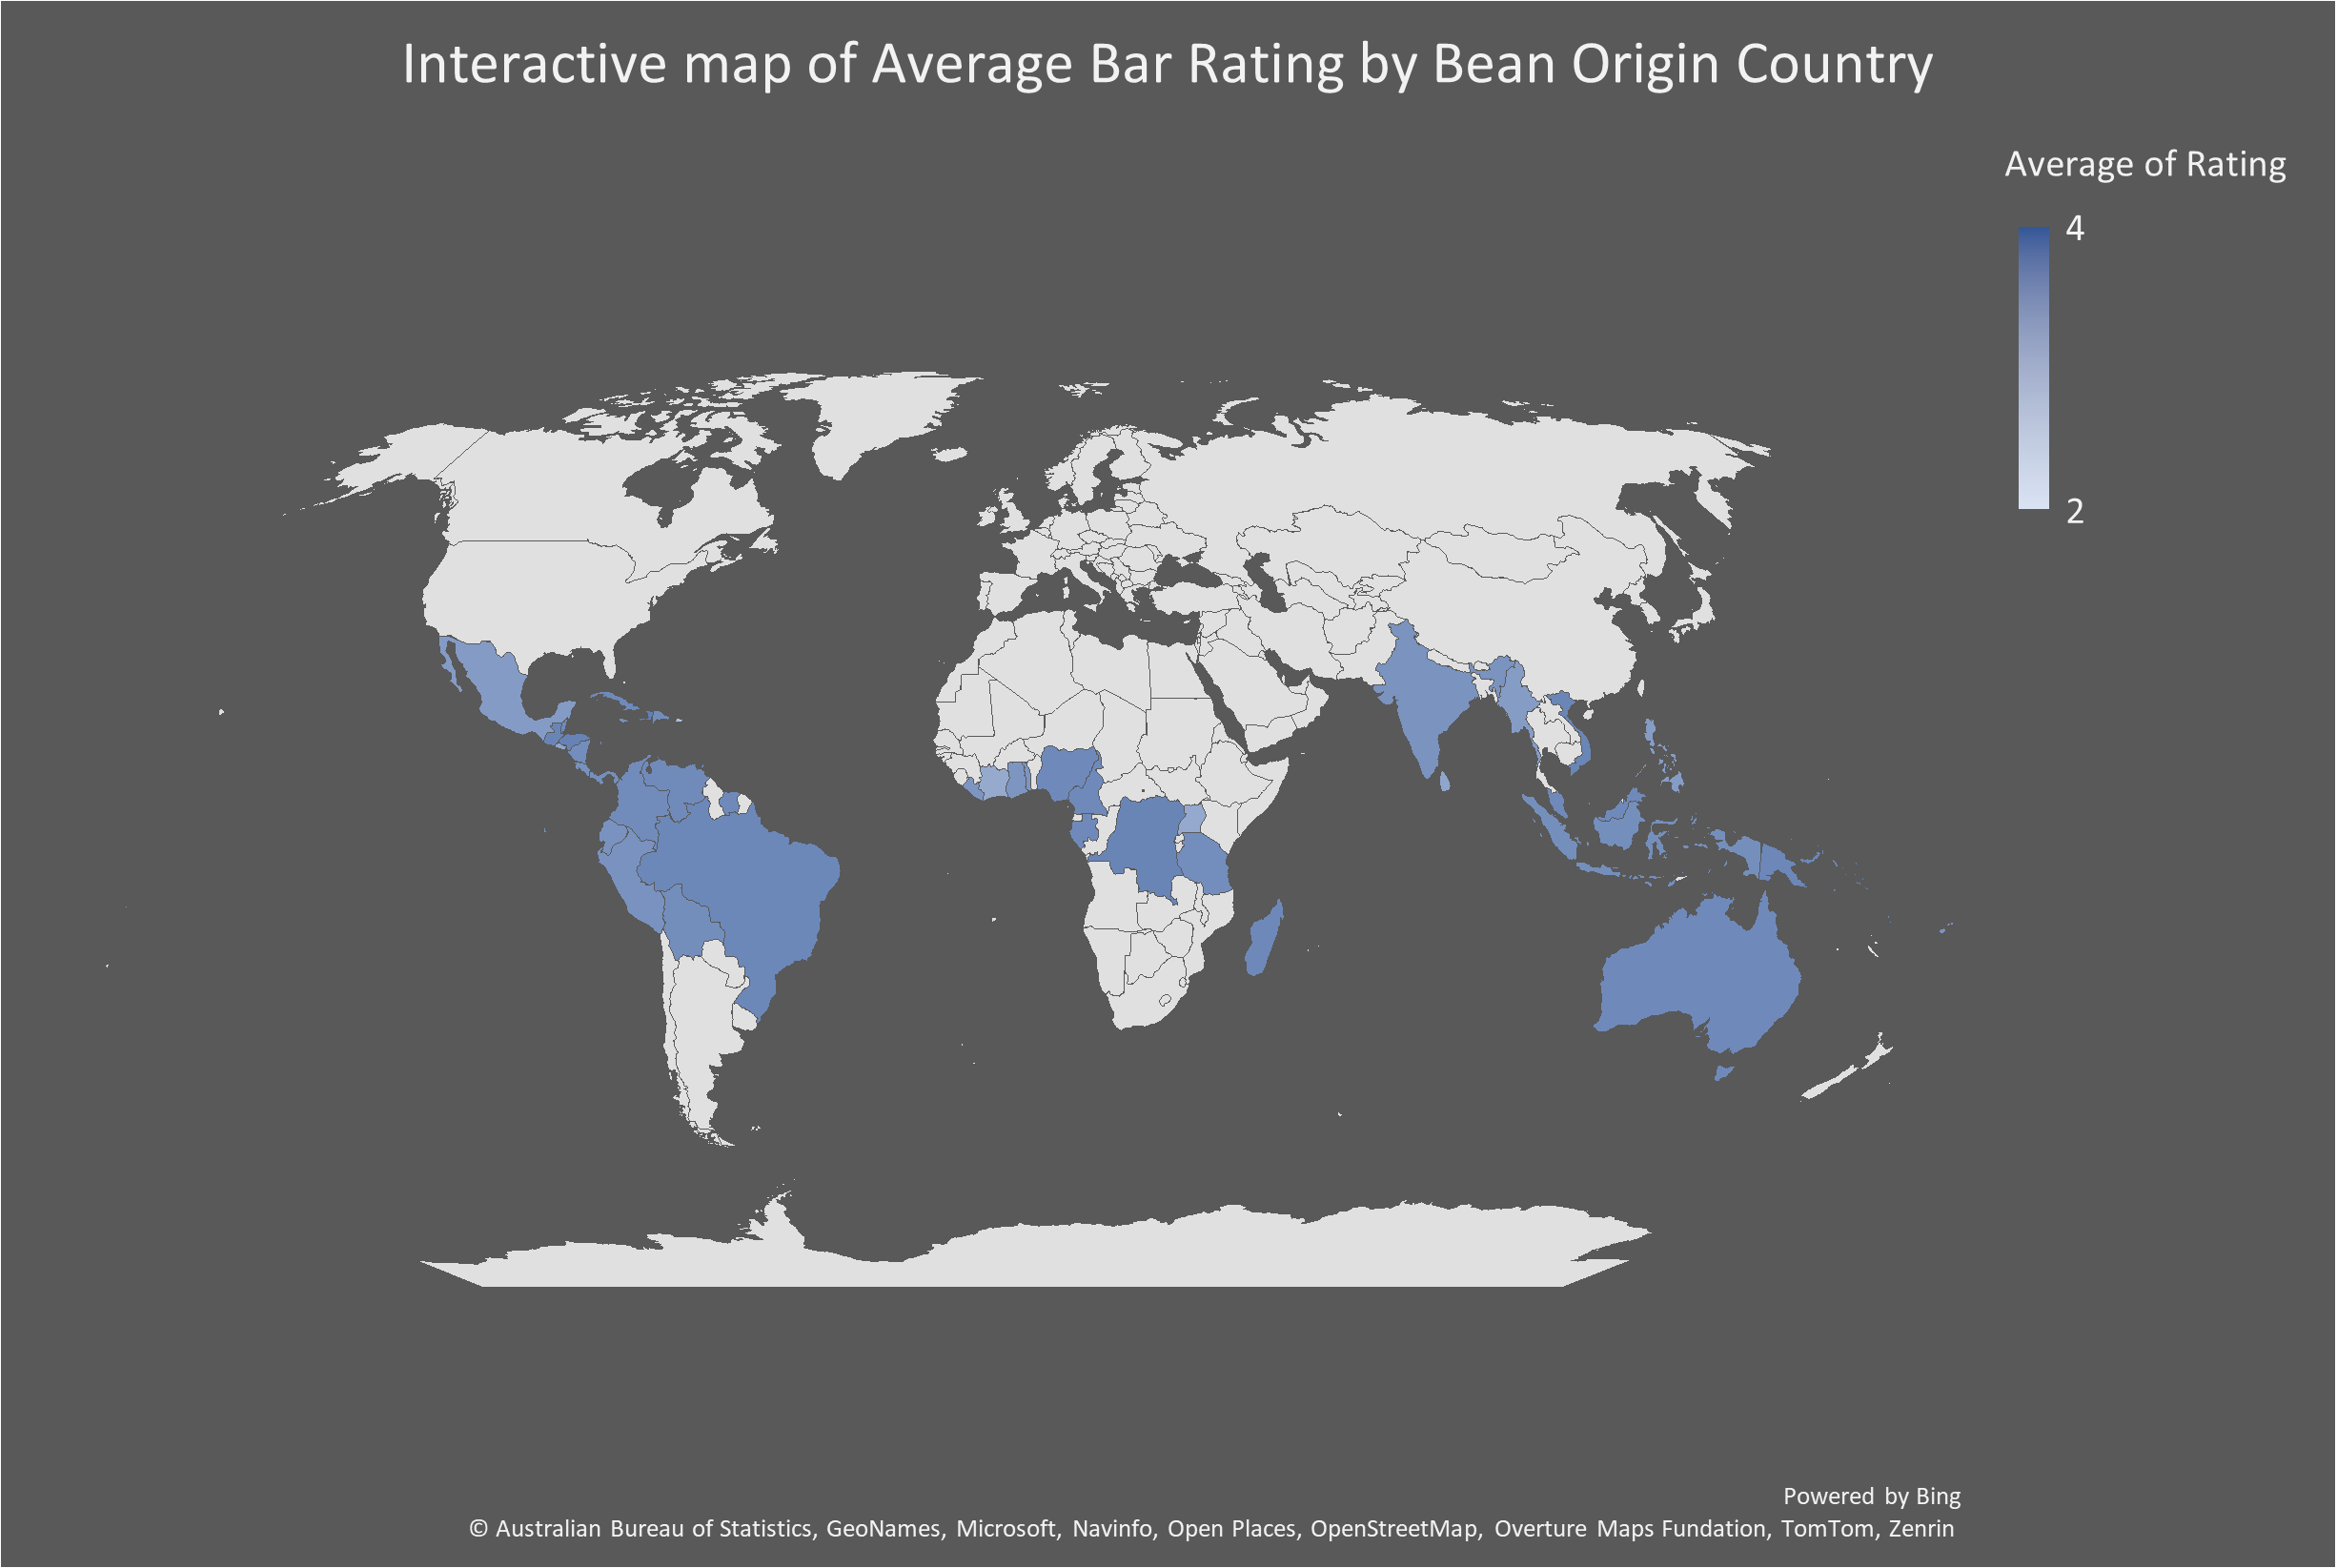

4. Why is it that most chocolate is not manufactured where the beans come from?

Despite cacao beans being predominantly grown in equatorial regions such as West Africa, South America, and Southeast Asia, most chocolate is manufactured in Europe and North America. This geographic disconnect is mainly rooted in historical, economic, and geopolitical factors. Former colonial powers established supply chains that extracted raw materials like cacao from colonies, processing them back in Europe, to where the best infrastructure, capital, and global consumer markets were concentrated. This largely explains why even today, manufacturing remains centered mainly in wealthier countries with more established food industries, stronger branding and marketing capabilities, and access to international markets. Additionally, limited infrastructure and investment in many cacao-growing countries often hinder local value addition. Therefore, countries like Côte d’Ivoire and Ghana who produce the majority of the world's cacao, see little of the final product's profit margin.  
This can often create unrest.


Before moving on, I believe I have now made you wait long enough.  It is time to reveal which chocolate bar was rated 5 out of 5!  The awaited bar is a 70% cocoa dark chocolate bar made in Italy in 2007.  The beans come from Venezuela Trinatario and the bar is named Amedei Chuao.  A very appetising picture of it can be seen below. 

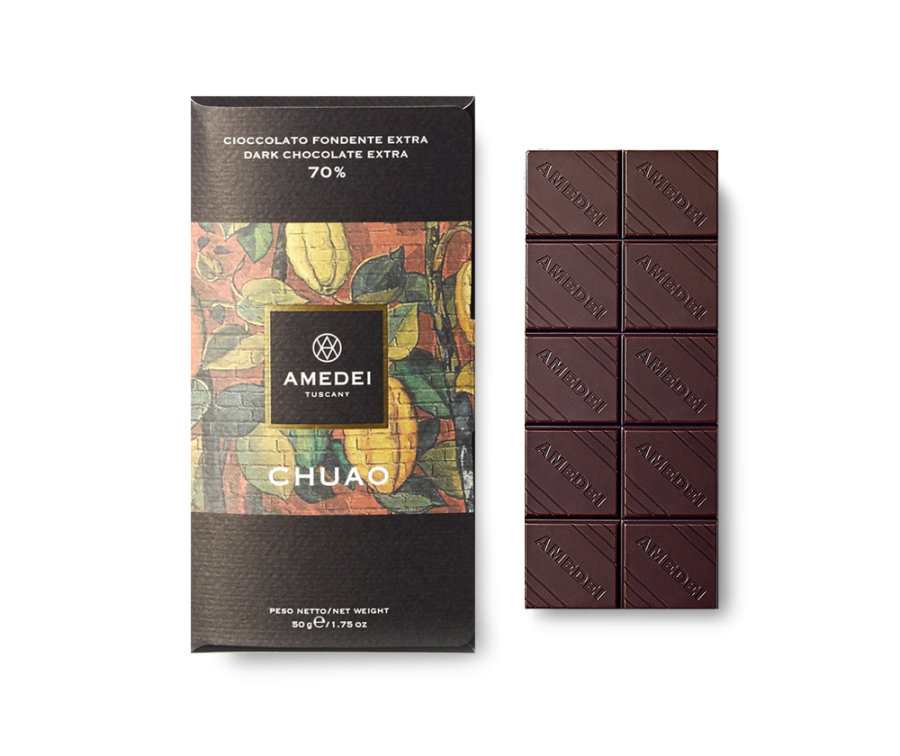


5. Rising cocoa bean prices affecting chocolate retail prices

In recent years, the price of dark chocolate has steadily been increasing.  This gradual increase has largely been driven by the price of its main ingredient, cacao beans.  Therefore, examining the gradual change of cacao bean prices and analysing economic and geo-political factors that have caused this will help us understand why chocolate is becoming more and more expensive. 

In [14]:
#webscraping

import sqlite3
from bs4 import BeautifulSoup
import requests
import pandas as pd

page_to_scrape = requests.get('https://www.indexmundi.com/commodities/?commodity=cocoa-beans&months=240')
soup = BeautifulSoup(page_to_scrape.text, "html.parser")

# Extracting table headers
columns = [header.text.strip() for header in soup.find_all("th")]

# Extracting table rows
rows = []
for row in soup.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == len(columns):  # Ensure row matches header count
        rows.append([cell.text.strip() for cell in cells])

df = pd.DataFrame(rows, columns=columns)

# Here I am turning 'Month' column into datetime objects
df['Month'] = pd.to_datetime(df['Month'], format='%b %Y', errors='coerce')

df = df[df['Month'].between('2005-01-01', '2024-12-31')]

print(df.head())
print(df.shape)

       Month Price  Change
0 2005-03-01  1.76       -
1 2005-04-01  1.59  -9.66%
2 2005-05-01  1.51  -5.03%
3 2005-06-01  1.54   1.99%
4 2005-07-01  1.49  -3.25%
(237, 3)


Above is the headof the data we will be using to further our analysis

Below is a table of the average price in US dollars per kilogram of cocoa beans for each year between 2005 to 2024. 

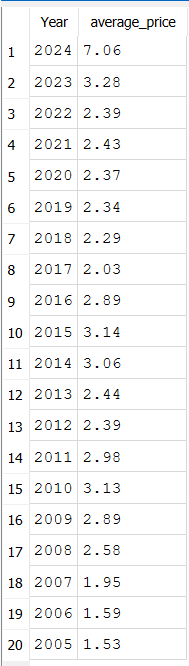

Over the span of 20 years, a kilogram of cacao beans has increased by 5.53 dollars. In recent years, the price has been jumping up faster than ever.  Should this be of concern?

Dark chocolate contains a higher percentage of cocoa solids compared to milk chocolate, meaning that it’s particurlarly sensitive to these raw material costs.  Therefore a steep increase in cacao bean price will be very visible in our retail aisles. 

A combination of factors explain the surge of cacao bean prices: climate change affecting crop yields, plant diseases, and political instability in major producing countries like Côte d’Ivoire and Ghana. Such price increases have been terribly affecting global supply chains. We can see a huge surge in 2024, from 3.28 dollars per kg to 7.06, due to poor harvest and supply shortages which drastically affected the dark chocolate industry. Producers struggle to produce enough beans and gain profit, manufacturers face pressure to adapt packaging and recipes to reduce costs, while consumers have to bare the higher costs of their guilty pleasure. 

Below can be seen the maximum price increase change in percentage and the month and year it occured.

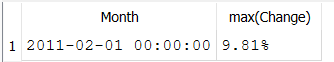

In February 2011, the Cacao bean price increased by 9.81%.  This can be put down to the Ivory Coast being in the midst of a civil conflict following a disputed presidential election in late 2010.  Heightenned tensions and violence in the largest cacoa producing country meant that exports were disrupted leading to a global supply shortage. Indeed Ivory Coast is responsible for around a third of cacao bean production, so such termoil drastically causes prices to spike. 

What can we learn from this?

Sharp price spikes like in 2024 or in 2011 highlight the fragility of the global cacao supply chain, which is heavily concentrated in just a few politically and environmentally vulnerable regions. Such events like civil unrest, climate disruptions, or labor strikes can quickly affect global markets and innevitably production costs. 
For chocolate manufacturers, this poses a significant supply chain risk. It suggests a growing need to diversify sourcing, invest in more resilient farming communities, or even explore alternative cacao varieties and agroforestry practices that can withstand such shocks. Building a more stable, ethical supply chain isn’t just good for sustainability, but is also a strategic move to protect the future of dark chocolate.

6. Preparing the chocolate industry for the future

In order to smooth out future price spikes and enable the industry to better adapt to shocks in supply chain, creating a predictive model for future prices can be a useful tool.  Using a model that learns from past data and can recognise geo-political and numerous other patterns will greatly assist producers, manufacturers in adapting to future shocks, therefore stablising the price of chocolate.
Below, a RandomForrestRegressor model can be seen.  The very low mean absolute error and very high R-squared score show the proficiency of our model.  An example of a future predicted score has also been inserted below.
Additionally there is a plot of the actual prices of cacao beans by year and the predicted ones.  The proximity of both the blue and yellow lines in this plot show the accuracy of the predictive model in using past data to predict future prices.  I believe a tool such as this one is a good starting point, and adding more accurate and varied data into a similar model can help create even more accurate price predictions, thus helping the chocolate industry adapt to shocks. 

Mean Absolute Error (MAE): 0.11888936170212738
R-squared Score: 0.9686930737008033
Predicted Future Price: [7.7848]


c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


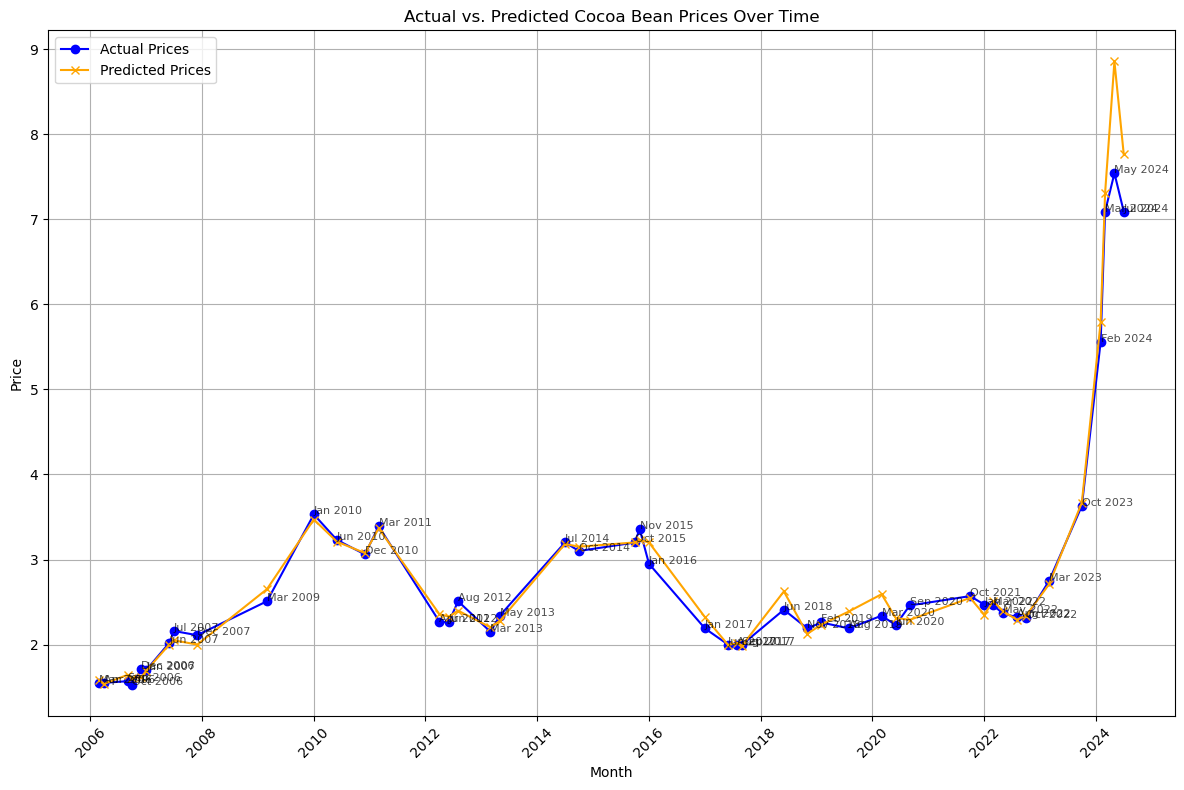

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Some data preprocessing
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])

# Feature engineering: creating lag features and rolling averages
df['Lag_1'] = df['Price'].shift(1)
df['Lag_3'] = df['Price'].shift(3)
df['Rolling_Avg_3'] = df['Price'].rolling(3).mean()
df = df.dropna()  # Drop rows with NaN values due to shifting

# Here, I am defining features (X) and target (y)
X = df[['Lag_1', 'Lag_3', 'Rolling_Avg_3']]
y = df['Price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Here, I am evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

# Predict future price
future_features = np.array([[df['Price'].iloc[-1], df['Price'].iloc[-3], df['Price'].iloc[-3:].mean()]])
future_price = model.predict(future_features)
print("Predicted Future Price:", future_price)

import matplotlib.pyplot as plt
import pandas as pd

# Extract the indices of the test data
test_indices = X_test.index

# Retrieve the corresponding months from the original DataFrame
test_months = df.loc[test_indices, 'Month']

# Create a DataFrame of actual vs. predicted prices with corresponding months
results_df = pd.DataFrame({
    'Month': test_months,
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Sort results by month for better visualization
results_df = results_df.sort_values(by='Month')
# Plot actual vs. predicted prices
plt.figure(figsize=(12, 8))
plt.plot(results_df['Month'], results_df['Actual Price'], label='Actual Prices', color='blue', marker='o')
plt.plot(results_df['Month'], results_df['Predicted Price'], label='Predicted Prices', color='orange', marker='x')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Cocoa Bean Prices Over Time")
plt.legend()
plt.grid(True)

# Annotate points with Month
for i in range(len(results_df)):
    plt.text(results_df['Month'].iloc[i], results_df['Actual Price'].iloc[i], 
             results_df['Month'].iloc[i].strftime('%b %Y'), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd

# Example: Simulating features for September 2027

last_price = df['Price'].iloc[-1]  # The most recent price
lag_1 = last_price  # September 2027's lag_1 would be the last price in the dataset
lag_3 = df['Price'].iloc[-3]  # Lag_3 would be the price 3 steps before the last one
rolling_avg_3 = df['Price'].iloc[-3:].mean()  # Rolling average of the last 3 months

# Create feature array for the prediction
future_features = pd.DataFrame([[lag_1, lag_3, rolling_avg_3]], columns=['Lag_1', 'Lag_3', 'Rolling_Avg_3'])

In [16]:
from nbconvert import HTMLExporter
import nbformat

# Load the current notebook
notebook_path = "Blog post.ipynb"  # Ensure the file name matches your current notebook
exported_html_path = "Blog_post_exported4.html"

with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Configure the exporter
html_exporter = HTMLExporter()
html_exporter.exclude_input = True  # Hide code cells
html_exporter.template_name = "classic"

# Export to HTML
body, resources = html_exporter.from_notebook_node(notebook)
with open(exported_html_path, "w", encoding="utf-8") as f:
    f.write(body)

print(f"HTML file saved as {exported_html_path}")



HTML file saved as Blog_post_exported4.html
